<a href="https://colab.research.google.com/github/TarekHasan011/Artificial-Intelligence/blob/main/Single_Server_Queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [ ]:
class SSQ:

    def __init__(self,Arrival_time,Service_time,algorithm):
        
        self.Arrival_time = Arrival_time
        self.Service_time = {}
        self.algorithm = algorithm

        self.Q_t_x = np.array([])
        self.Q_t_y = np.array([])

        self.B_t_x = np.array([])
        self.B_t_y = np.array([])

        for i in range(len(Service_time)):
            self.Service_time[Arrival_time[i]] = Service_time[i]

        self.iteration = 0

        self.clock = [0, 'X']
        self.event_List = [self.Arrival_time[self.iteration],np.inf]
        self.server_status = 0
        self.number_in_queue = 0
        self.times_of_arrival = []
        self.number_of_customer_delay = 0
        self.total_delay = 0
        self.area_under_Qt = 0
        self.area_under_Bt = 0

        self.prev_clock = 0
        self.print_iter = 0
        
    def run(self):

        f = open('simulation_result.csv','w',newline="")
        writer = csv.writer(f)
        tup1 = ("","Clock","Event List","Server Status","Number in Queue","Times of Arrival","Number of Customer Delay","Total Delay","Area Under Q(t)","Area Under B(t)")
        writer.writerow(tup1)
        f.close()

        print("*******START OF THE SIMULATION*******")
        self.time_advancement()

    def show_current_status(self):
        print(f'clock: {self.clock} \tA: {self.event_List[0]} D: {self.event_List[1]} \tServer Status : {self.server_status} \tNumber in Queue: {self.number_in_queue} \tTimes of Arrival: {self.times_of_arrival} \tNumber of Customer Delay: {self.number_of_customer_delay} \tTotal Delay: {round(self.total_delay,4)} \tArea Under Q(t): {round(self.area_under_Qt,4)} \tArea Under B(t): {round(self.area_under_Bt,4)}')
        f = open('simulation_result.csv','a',newline="")
        writer = csv.writer(f)
        tup1 = (self.print_iter,'0' if self.clock[1]=='X' else f'{self.clock[0]} ({self.clock[1]})',f'A: {self.event_List[0]} ; D: {self.event_List[1]}',self.server_status,self.number_in_queue,self.times_of_arrival,self.number_of_customer_delay,round(self.total_delay,4),round(self.area_under_Qt,4),round(self.area_under_Bt,4))
        writer.writerow(tup1)
        f.close()
        self.print_iter+=1

    def mechanism(self):
        if self.algorithm == "FIFO":
            return self.times_of_arrival.pop(0)
        elif self.algorithm == "LIFO":
            return self.times_of_arrival.pop(len(self.times_of_arrival)-1)
        else:
            val = np.inf
            for i in range(len(self.times_of_arrival)):
                if self.Service_time[self.times_of_arrival[i]] < val:
                    it = i
                    val = self.Service_time[self.times_of_arrival[i]]
            temp = self.times_of_arrival[it]
            self.times_of_arrival.pop(it)
            return temp


    def time_advancement(self):
        self.show_current_status()

        # start stopping condition
        if self.event_List[0] == np.inf and self.event_List[1] == np.inf:
            print("*******END OF THE SIMULATION*******")
            return
        # end stopping condition

        

        self.prev_clock = self.clock[0]
        
        self.clock = [self.event_List[0],'A'] if self.event_List[0]<self.event_List[1] else [self.event_List[1],'D']
        
        self.area_under_Qt += (self.clock[0]-self.prev_clock) * self.number_in_queue

        temp_x = np.arange(self.prev_clock,self.clock[0],0.01)
        self.Q_t_x = np.array(list(self.Q_t_x)+list(temp_x))
        self.Q_t_y = np.array(list(self.Q_t_y)+list(np.array([self.number_in_queue]*len(temp_x))))

        self.area_under_Bt += (self.clock[0]-self.prev_clock) * self.server_status
        
        self.B_t_x = np.array(list(self.B_t_x)+list(temp_x))
        self.B_t_y = np.array(list(self.B_t_y)+list(np.array([self.server_status]*len(temp_x))))

        self.prev_clock = self.clock[0]

        if self.clock[1] == 'A':

            self.iteration += 1
            if self.iteration >= len(self.Arrival_time):
                self.event_List[0] = np.inf
            else:
                self.event_List[0] = self.Arrival_time[self.iteration]
            
            if self.server_status == 0:
                self.server_status = 1
                self.number_of_customer_delay+=1
                self.event_List[1] = self.clock[0] + self.Service_time[self.clock[0]]
            else:
                self.number_in_queue+=1
                self.times_of_arrival.append(self.clock[0])
        else:
            if self.number_in_queue == 0:
                self.event_List[1] = np.inf
                self.server_status = 0
            else:
                self.number_in_queue-=1
                next_start = self.mechanism()
                self.total_delay += (self.clock[0]-next_start)
                self.event_List[1] = self.clock[0]+self.Service_time[next_start]
                self.number_of_customer_delay+=1
        self.time_advancement()

    def Report_Generation(self):
        print(f'Average Delay: {round(self.total_delay/self.number_of_customer_delay,4)}')
        print(f'Expected number of customers in the queue: {round(self.area_under_Qt/self.prev_clock,4)}')
        print(f'Average utilization: {round(self.area_under_Bt/self.prev_clock,4)}')

        
        plt.plot(self.Q_t_x,self.Q_t_y)
        plt.xticks(np.arange(0, 10, 0.5))
        plt.xlabel('t')
        plt.ylabel('Q(t)')
        plt.title('Customers in the Queue')
        
        
        plt.show()
        plt.clf()

        plt.plot(self.B_t_x,self.B_t_y)
        plt.xticks(np.arange(0, 10, 0.5))
        plt.xlabel('t')
        plt.ylabel('B(t)')
        plt.title('Utilization of the Server')
        
        
        plt.show()

In [ ]:
A = [0.8,2.5,2.8,4.7,5.2,5.5,7.6]
S = [2.2,0.5,0.4,2.8,0.2,0.6,0.9]
simulator = SSQ(A,S,"SJF")

In [ ]:
simulator.run()

*******START OF THE SIMULATION*******
clock: [0, 'X'] 	A: 0.8 D: inf 	Server Status : 0 	Number in Queue: 0 	Times of Arrival: [] 	Number of Customer Delay: 0 	Total Delay: 0 	Area Under Q(t): 0 	Area Under B(t): 0
clock: [0.8, 'A'] 	A: 2.5 D: 3.0 	Server Status : 1 	Number in Queue: 0 	Times of Arrival: [] 	Number of Customer Delay: 1 	Total Delay: 0 	Area Under Q(t): 0.0 	Area Under B(t): 0.0
clock: [2.5, 'A'] 	A: 2.8 D: 3.0 	Server Status : 1 	Number in Queue: 1 	Times of Arrival: [2.5] 	Number of Customer Delay: 1 	Total Delay: 0 	Area Under Q(t): 0.0 	Area Under B(t): 1.7
clock: [2.8, 'A'] 	A: 4.7 D: 3.0 	Server Status : 1 	Number in Queue: 2 	Times of Arrival: [2.5, 2.8] 	Number of Customer Delay: 1 	Total Delay: 0 	Area Under Q(t): 0.3 	Area Under B(t): 2.0
clock: [3.0, 'D'] 	A: 4.7 D: 3.4 	Server Status : 1 	Number in Queue: 1 	Times of Arrival: [2.5] 	Number of Customer Delay: 2 	Total Delay: 0.2 	Area Under Q(t): 0.7 	Area Under B(t): 2.2
clock: [3.4, 'D'] 	A: 4.7 D: 3.9 	Ser

Average Delay: 0.9
Expected number of customers in the queue: 0.6848
Average utilization: 0.8261


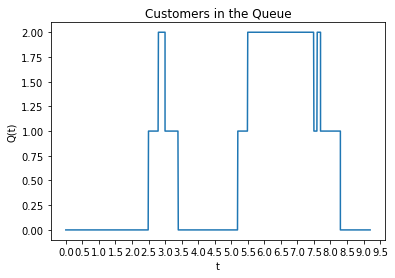

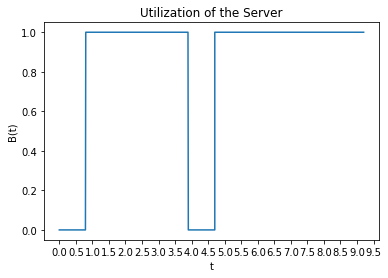

In [ ]:
simulator.Report_Generation()